#**Roll Number : CE137**
#**Exercise**

  #Task 2: Apply algorithm on wine dataset - LabelEncoding of features: and Train test Division 66%-34%

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import tkinter
import graphviz

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Loading wine dataset red one
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Labs/Lab 4/winequality-red.csv') 
print("\nData :\n", dataset)


Data :
       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ... 

  **All the feature values in Dataset are numeric so no need of label encoding**

In [5]:
#creating labelEncoder
# le = preprocessing.LabelEncoder()
# trying to encode float point type
# fixed_acidity_encoded = le.fit_transform(dataset["fixed acidity"])
# print("fixed_acidity_encoded :", fixed_acidity_encoded)

In [6]:
# Considering quality as class label and rest as features
cols = dataset.columns.drop('quality')
# print(cols)
features = dataset[dataset.columns.drop('quality')]
# print(features)

target = dataset["quality"]
# print(target)

In [7]:
#import the necessary module
from sklearn.model_selection import train_test_split

#split data set into train and test sets into 66% - 34%
data_train, data_test, target_train, target_test = train_test_split(features,
                        target, test_size = 0.34, random_state = 137)

In [8]:
#Create a Decision Tree Classifier (using Entropy)
dt_classifier = DecisionTreeClassifier()

# Train the model using the training sets
model = dt_classifier.fit(data_train, target_train)

In [9]:
# Predict the classes of test data
test_pred = model.predict(data_test)
# print(test_pred.dtype)

In [10]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='wine_tree.dot',feature_names=cols,
               class_names="quality", filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'wine_tree.dot', '-o', 'wine_tree.png', '-Gdpi=600'])

0

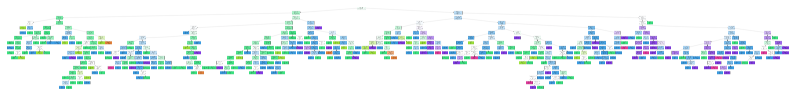

In [11]:
# Displaying in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('wine_tree.png'))
plt.axis('off')
plt.show()